In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

Compiling complete dataframe

In [2]:
df_tfidf = pd.read_csv("df_tfidf_v2.csv")

In [3]:
df_tfidf

,tfidf_0,tfidf_1,tfidf_2,tfidf_3,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,tfidf_9,...,tfidf_378,tfidf_379,tfidf_380,tfidf_381,tfidf_382,tfidf_383,tfidf_384,tfidf_385,tfidf_386,tfidf_387
0,0.0,0.21444,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.178793,0.0,0.0,0.0,0.0,0.0
1,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.324705,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.00000,0.0,0.0,0.0,0.145484,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.208295,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42972,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
42973,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
42974,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
42975,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.548005,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [5]:
df_no_lsa = pd.read_csv("df_final_mlp.csv")

In [6]:
df_no_lsa

,hybrid,indica,sativa,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,lsa_5,lsa_6,...,X..3-Carene,X..Alpha-Terpinene,X..Ocimene,X..Eucalyptol,X..Terpinolene,X..Isopulegol,X..Geraniol,X..Guaiol,X..CaryophylleneOxide,X..Alpha-Bisabolol
0,1,0,0,0.418311,0.274948,-0.046076,0.079432,-0.283345,0.110858,-0.001165,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
1,1,0,0,0.348428,-0.018824,0.353926,0.053830,0.027603,0.041568,-0.021110,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
2,1,0,0,0.384142,0.220097,-0.067963,0.086681,-0.166829,-0.105413,0.004228,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
3,1,0,0,0.353262,0.104061,0.170056,-0.155247,0.225551,-0.090213,-0.154757,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
4,1,0,0,0.391750,-0.092959,-0.142575,-0.140255,0.217436,-0.074387,-0.211877,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42972,0,1,0,0.195335,-0.041536,0.022845,-0.037624,0.018596,-0.038189,-0.089364,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263
42973,0,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263
42974,0,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263
42975,0,1,0,0.424053,0.201999,-0.126061,0.001543,-0.122060,-0.079580,0.264316,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263


In [7]:
df_no_lsa = df_no_lsa.drop(['lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'lsa_5',
 'lsa_6',
 'lsa_7',
 'lsa_8',
 'lsa_9',
 'lsa_10',
 'lsa_11',
 'lsa_12',
 'lsa_13',
 'lsa_14',
 'lsa_15',
 'lsa_16',
 'lsa_17',
 'lsa_18',
 'lsa_19',
 'lsa_20',
 'lsa_21',
 'lsa_22',
 'lsa_23',
 'lsa_24',
 'lsa_25',
 'lsa_26',
 'lsa_27',
 'lsa_28',
 'lsa_29',
 'lsa_30'], axis = 1)

In [8]:
df_no_lsa

,hybrid,indica,sativa,anxiety,anxious,aroused,arthritis,creative,depression,dizzy,...,X..3-Carene,X..Alpha-Terpinene,X..Ocimene,X..Eucalyptol,X..Terpinolene,X..Isopulegol,X..Geraniol,X..Guaiol,X..CaryophylleneOxide,X..Alpha-Bisabolol
0,1,0,0,0,0,0,0,0,0,1,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
1,1,0,0,0,0,1,0,0,0,0,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
2,1,0,0,0,0,1,0,1,0,1,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
3,1,0,0,0,0,0,0,0,0,0,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
4,1,0,0,0,0,0,0,0,0,0,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42972,0,1,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263
42973,0,1,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263
42974,0,1,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263
42975,0,1,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263


In [9]:
df_knn = pd.concat([df_tfidf, df_no_lsa], axis = 1)

In [10]:
df_knn.columns.to_list()

['tfidf_0',
 'tfidf_1',
 'tfidf_2',
 'tfidf_3',
 'tfidf_4',
 'tfidf_5',
 'tfidf_6',
 'tfidf_7',
 'tfidf_8',
 'tfidf_9',
 'tfidf_10',
 'tfidf_11',
 'tfidf_12',
 'tfidf_13',
 'tfidf_14',
 'tfidf_15',
 'tfidf_16',
 'tfidf_17',
 'tfidf_18',
 'tfidf_19',
 'tfidf_20',
 'tfidf_21',
 'tfidf_22',
 'tfidf_23',
 'tfidf_24',
 'tfidf_25',
 'tfidf_26',
 'tfidf_27',
 'tfidf_28',
 'tfidf_29',
 'tfidf_30',
 'tfidf_31',
 'tfidf_32',
 'tfidf_33',
 'tfidf_34',
 'tfidf_35',
 'tfidf_36',
 'tfidf_37',
 'tfidf_38',
 'tfidf_39',
 'tfidf_40',
 'tfidf_41',
 'tfidf_42',
 'tfidf_43',
 'tfidf_44',
 'tfidf_45',
 'tfidf_46',
 'tfidf_47',
 'tfidf_48',
 'tfidf_49',
 'tfidf_50',
 'tfidf_51',
 'tfidf_52',
 'tfidf_53',
 'tfidf_54',
 'tfidf_55',
 'tfidf_56',
 'tfidf_57',
 'tfidf_58',
 'tfidf_59',
 'tfidf_60',
 'tfidf_61',
 'tfidf_62',
 'tfidf_63',
 'tfidf_64',
 'tfidf_65',
 'tfidf_66',
 'tfidf_67',
 'tfidf_68',
 'tfidf_69',
 'tfidf_70',
 'tfidf_71',
 'tfidf_72',
 'tfidf_73',
 'tfidf_74',
 'tfidf_75',
 'tfidf_76',
 'tfidf_7

In [11]:
df_knn

,tfidf_0,tfidf_1,tfidf_2,tfidf_3,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,tfidf_9,...,X..3-Carene,X..Alpha-Terpinene,X..Ocimene,X..Eucalyptol,X..Terpinolene,X..Isopulegol,X..Geraniol,X..Guaiol,X..CaryophylleneOxide,X..Alpha-Bisabolol
0,0.0,0.21444,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
1,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
2,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.324705,0.0,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
3,0.0,0.00000,0.0,0.0,0.0,0.145484,0.0,0.0,0.000000,0.0,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
4,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42972,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263
42973,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263
42974,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263
42975,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263


In [ ]:
df_knn.to_csv("df_knn.csv", index = False)

Splitting dependent and independent variables

In [12]:
X = df_knn.drop(['X..Delta9-THC',
 'X..CBD',
 'X..CBN',
 'X..CBG',
 'X..CBC',
 'X..THCV',
 'X..D-Limonene',
 'X..Beta-Ocimene',
 'X..Beta-Myrcene',
 'X..Beta-Pinene',
 'X..Linalool',
 'X..Alpha-Pinene',
 'X..Camphene',
 'X..3-Carene',
 'X..Alpha-Terpinene',
 'X..Ocimene',
 'X..Eucalyptol',
 'X..Terpinolene',
 'X..Isopulegol',
 'X..Geraniol',
 'X..Guaiol',
 'X..CaryophylleneOxide',
 'X..Alpha-Bisabolol'], axis = 1)
y = df_knn[['X..Delta9-THC',
 'X..CBD',
 'X..CBN',
 'X..CBG',
 'X..CBC',
 'X..THCV',
 'X..D-Limonene',
 'X..Beta-Ocimene',
 'X..Beta-Myrcene',
 'X..Beta-Pinene',
 'X..Linalool',
 'X..Alpha-Pinene',
 'X..Camphene',
 'X..3-Carene',
 'X..Alpha-Terpinene',
 'X..Ocimene',
 'X..Eucalyptol',
 'X..Terpinolene',
 'X..Isopulegol',
 'X..Geraniol',
 'X..Guaiol',
 'X..CaryophylleneOxide',
 'X..Alpha-Bisabolol']]

Plotting histograms on target variable

In [13]:
y_array = y.to_numpy()
y_array

array([[0.25971245, 0.00104646, 0.13793103, ..., 0.44444444, 0.        ,
        0.        ],
       [0.25971245, 0.00104646, 0.13793103, ..., 0.44444444, 0.        ,
        0.        ],
       [0.25971245, 0.00104646, 0.13793103, ..., 0.44444444, 0.        ,
        0.        ],
       ...,
       [0.56255736, 0.00104646, 0.10344828, ..., 0.22222222, 0.        ,
        0.10526316],
       [0.56255736, 0.00104646, 0.10344828, ..., 0.22222222, 0.        ,
        0.10526316],
       [0.56255736, 0.00104646, 0.10344828, ..., 0.22222222, 0.        ,
        0.10526316]])

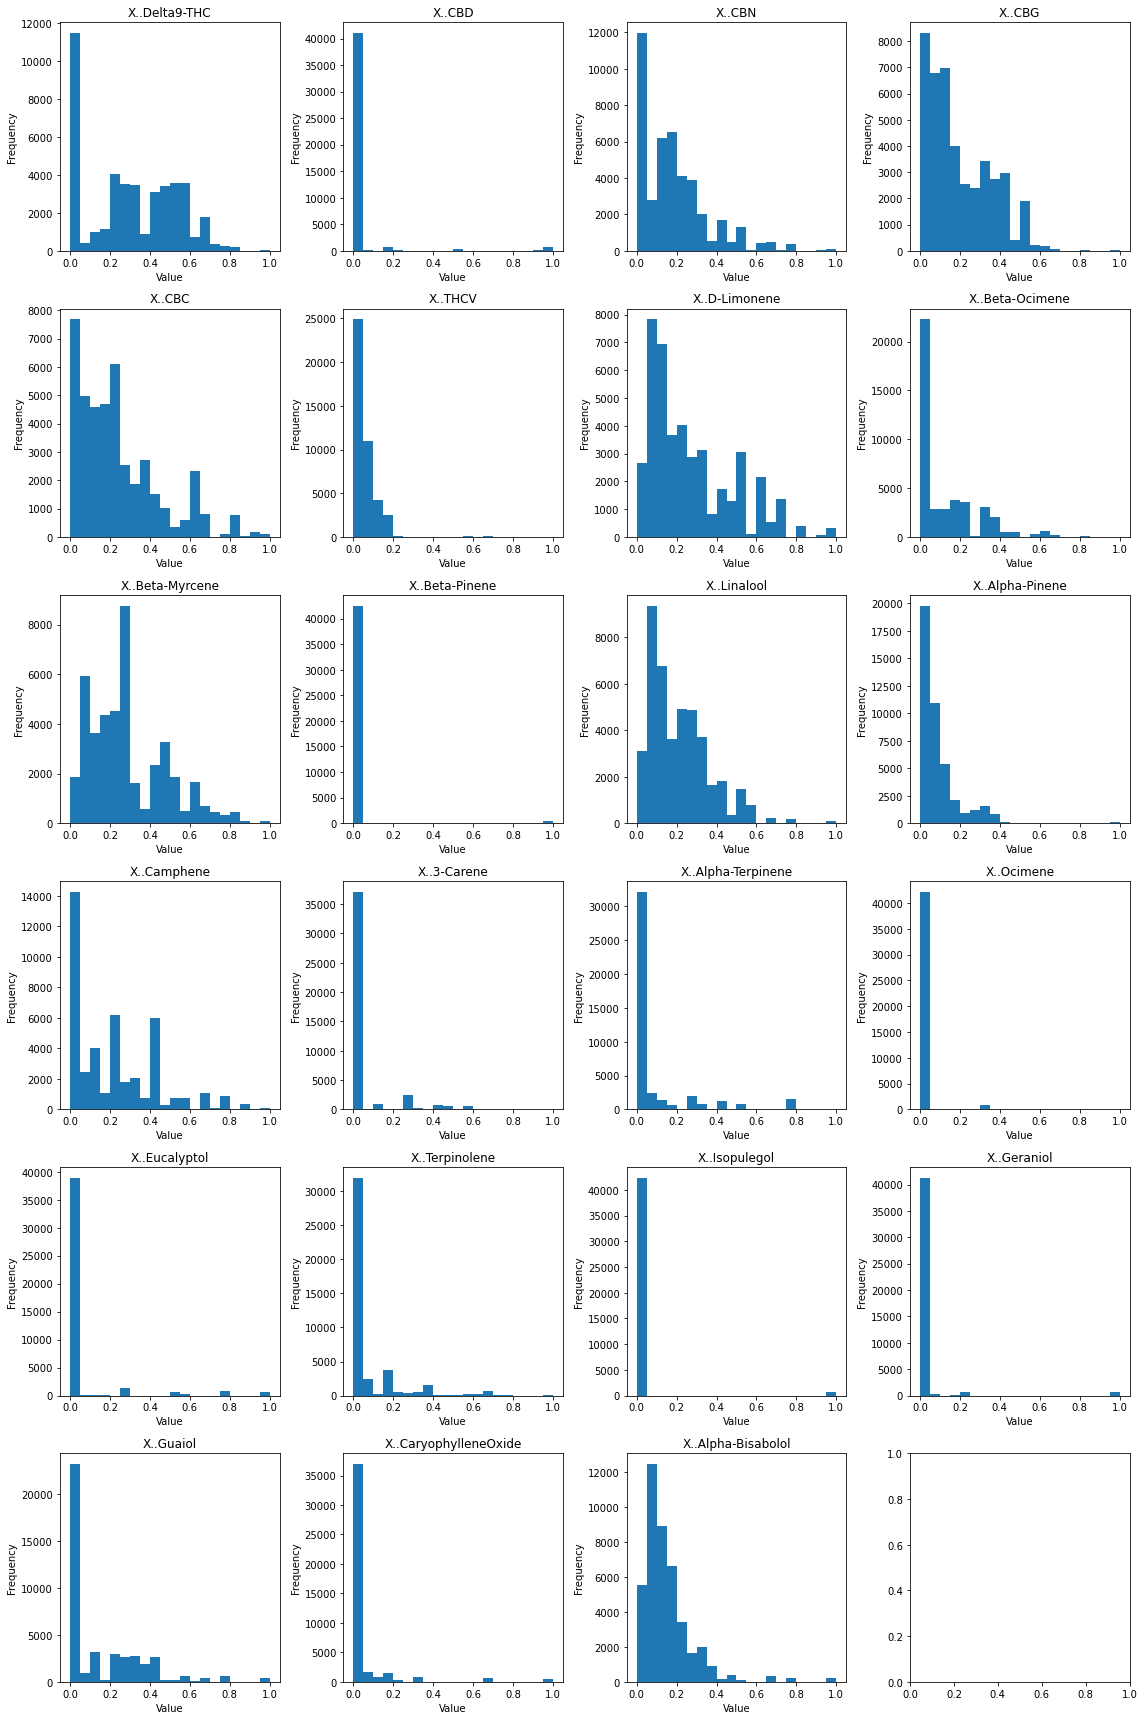

<Figure size 432x288 with 0 Axes>

In [17]:
# create a figure with subplots
fig, axs = plt.subplots(6, 4, figsize=(16, 24))

# create histograms for each target variable
for i in range(23):
    row = i // 4
    col = i % 4
    axs[row, col].hist(y_array[:, i], bins=20)
    axs[row, col].set_title(y.columns[i])
    axs[row, col].set_xlabel('Value')
    axs[row, col].set_ylabel('Frequency')

# adjust the layout and display the figure
plt.tight_layout()
plt.show()
plt.savefig("histogram all target.png")

Train test split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [16]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

kNN modeling (before Feature selection and Hyperparameter Tuning)

In [17]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [18]:
mean_absolute_error(y_val, y_pred_knreg)

0.08793158600551958

In [19]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.3845696536245655

In [20]:
#val
r2_score(y_val, y_pred_knreg)

0.040557153348920016

Residual plots for each target variable

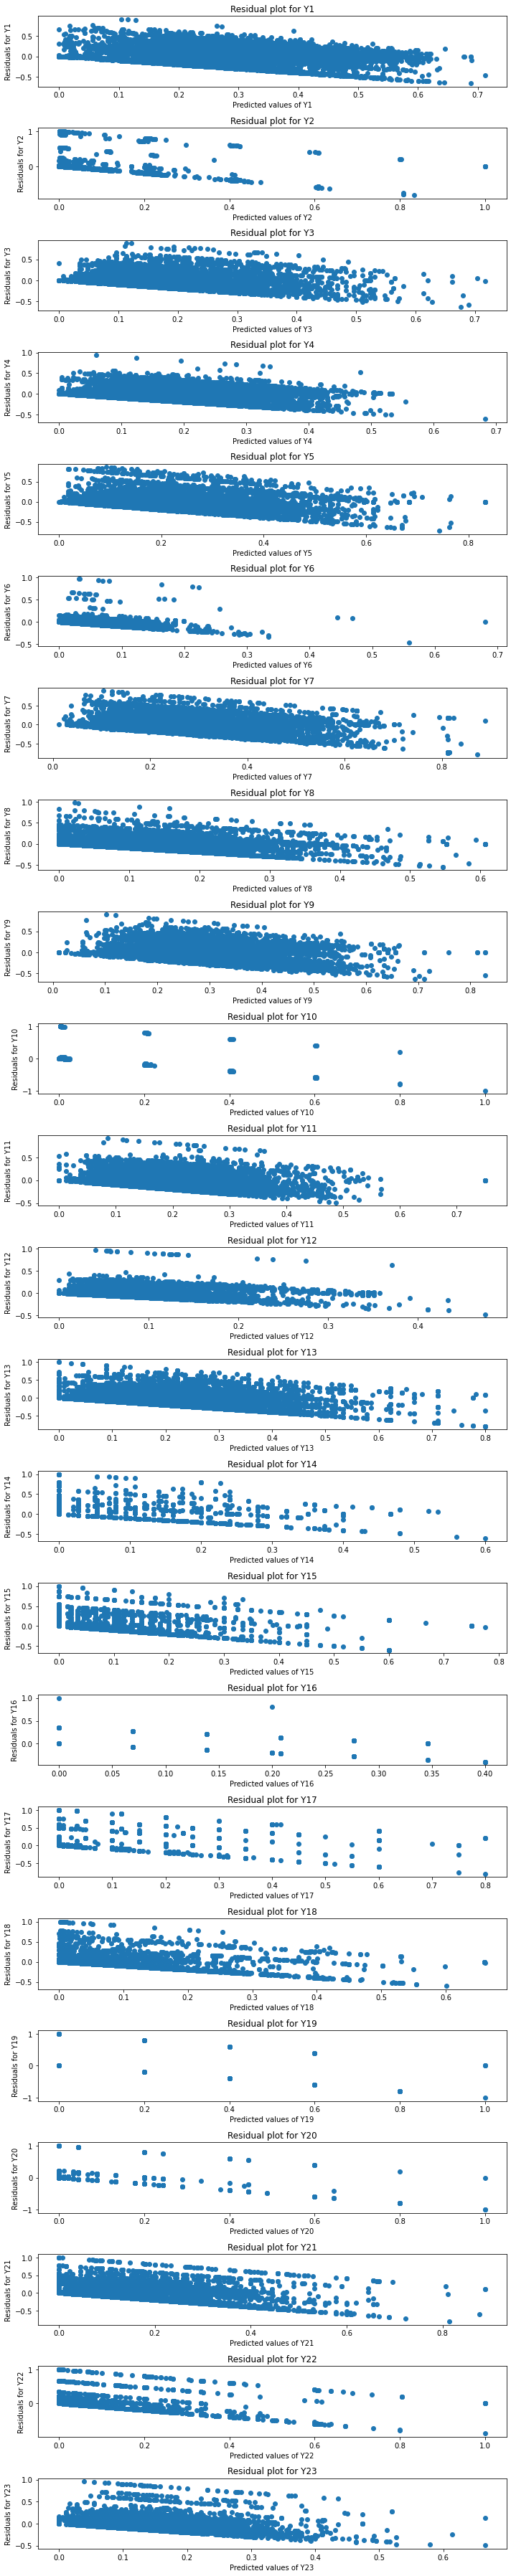

In [21]:
# Create residual plots for each target variable
num_targets = y_val.shape[1]  # 23 target variables
fig, axs = plt.subplots(num_targets, 1, figsize=(10, 50))

for i in range(num_targets):
    # Calculate residuals for target variable i
    #Y_predicted = model.predict(X)
    #Y_residuals = Y.iloc[:, i] - Y_predicted[:, i]
    #print(y_pred_knreg)
    y_residuals = y_val.iloc[:, i] - y_pred_knreg[:, i]
    # Create scatter plot of residuals against predicted values
    axs[i].scatter(y_pred_knreg[:, i], y_residuals)
    axs[i].set_xlabel('Predicted values of Y' + str(i+1))
    axs[i].set_ylabel('Residuals for Y' + str(i+1))
    axs[i].set_title('Residual plot for Y' + str(i+1))
    
plt.tight_layout()
plt.show()

Feature Selection

In [22]:
rfreg = RandomForestRegressor()

In [31]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

In [32]:
selector.estimator_.feature_importances_

array([1.11584223e-03, 1.31602097e-03, 9.95894298e-04, 1.11605416e-03,
       1.28901508e-03, 3.35114284e-03, 1.76282933e-03, 5.16907086e-03,
       6.99726035e-04, 1.88653778e-03, 9.84724132e-04, 4.86775870e-03,
       9.82424099e-04, 9.64599305e-04, 1.30259827e-03, 5.16626629e-04,
       1.61824622e-03, 1.93651380e-03, 9.03982989e-04, 1.32799161e-03,
       2.56245645e-03, 2.45624464e-03, 1.82670019e-03, 8.39490437e-04,
       9.77940029e-04, 8.69321792e-04, 2.09960785e-03, 9.03537938e-04,
       1.39425156e-03, 1.53022244e-03, 4.83283220e-03, 1.02224045e-03,
       1.87874545e-03, 9.77352125e-04, 2.09480467e-03, 2.98101673e-03,
       1.52222028e-03, 5.07076495e-03, 8.71096544e-04, 1.77023331e-03,
       6.40906302e-04, 1.16656150e-03, 5.53322690e-04, 4.69293976e-03,
       1.00774701e-03, 1.15707589e-03, 2.82085329e-03, 8.92867017e-04,
       2.21250993e-03, 9.00770222e-04, 8.24629161e-04, 1.00746084e-03,
       9.59593767e-04, 2.18395464e-03, 1.73472844e-03, 9.21027276e-04,
      

In [33]:
selector.threshold_

0.0021321961620469083

In [34]:
mask = selector.get_support()

In [35]:
mask

array([False, False, False, False, False,  True, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False,  True, False, False, False, False, False,  True, False,
       False,  True, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False,  True,
       False, False,  True, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False,  True,  True, False,
        True, False,

In [36]:
selected_features = X.columns[mask]

In [37]:
selected_X = df_knn[selected_features]
selected_X

,tfidf_5,tfidf_7,tfidf_11,tfidf_20,tfidf_21,tfidf_30,tfidf_35,tfidf_37,tfidf_43,tfidf_46,...,mint,orange,pine,pungent,sage,skunk,strawberry,sweet,vanilla,woody
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.14162,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,...,0,0,0,0,0,0,0,0,1,0
2,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.198545,0.0,...,0,0,0,0,0,0,0,1,1,0
3,0.145484,0.0,0.000000,0.0,0.0,0.0,0.213037,0.00000,0.000000,0.0,...,0,0,1,0,0,0,0,0,0,0
4,0.000000,0.0,0.165804,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42972,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
42973,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
42974,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
42975,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
selected_X.columns.to_list()

['tfidf_5',
 'tfidf_7',
 'tfidf_11',
 'tfidf_20',
 'tfidf_21',
 'tfidf_30',
 'tfidf_35',
 'tfidf_37',
 'tfidf_43',
 'tfidf_46',
 'tfidf_48',
 'tfidf_53',
 'tfidf_61',
 'tfidf_73',
 'tfidf_78',
 'tfidf_93',
 'tfidf_96',
 'tfidf_98',
 'tfidf_101',
 'tfidf_103',
 'tfidf_104',
 'tfidf_119',
 'tfidf_121',
 'tfidf_123',
 'tfidf_124',
 'tfidf_126',
 'tfidf_128',
 'tfidf_129',
 'tfidf_130',
 'tfidf_141',
 'tfidf_144',
 'tfidf_145',
 'tfidf_149',
 'tfidf_151',
 'tfidf_158',
 'tfidf_161',
 'tfidf_162',
 'tfidf_166',
 'tfidf_167',
 'tfidf_168',
 'tfidf_173',
 'tfidf_178',
 'tfidf_189',
 'tfidf_190',
 'tfidf_199',
 'tfidf_200',
 'tfidf_203',
 'tfidf_205',
 'tfidf_207',
 'tfidf_210',
 'tfidf_217',
 'tfidf_230',
 'tfidf_239',
 'tfidf_240',
 'tfidf_245',
 'tfidf_253',
 'tfidf_258',
 'tfidf_267',
 'tfidf_272',
 'tfidf_278',
 'tfidf_281',
 'tfidf_283',
 'tfidf_285',
 'tfidf_286',
 'tfidf_289',
 'tfidf_291',
 'tfidf_303',
 'tfidf_309',
 'tfidf_312',
 'tfidf_314',
 'tfidf_319',
 'tfidf_325',
 'tfidf_329'

In [39]:
import joblib

joblib.dump(selected_X, "selected_X_knn_tfidf.pkl")
joblib.dump(selector, "selector_knn_tfidf.pkl")
joblib.dump(rfreg, "rfreg_for_fs.pkl")

['rfreg_for_fs.pkl']

Train test split (after Feature Selection)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [41]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [42]:
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [43]:
mean_absolute_error(y_val, y_pred_knreg)

0.0870771971761661

In [44]:
mean_squared_error(y_val, y_pred_knreg)

0.02377305800034362

In [45]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.1477628078801329

In [46]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.38785259346021617

In [47]:
#val
r2_score(y_val, y_pred_knreg)

0.05436259746918874

Hyperparameter Tuning

In [48]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [49]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [50]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [51]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 15}

kNN (after hyperparameter tuning)

In [52]:
knreg_ht = KNeighborsRegressor(n_neighbors = 15, weights = 'distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [53]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.06310045624222792

In [54]:
mean_squared_error(y_val, y_pred_knreg_ht)

0.016825914361730258

In [55]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.1242857789256677

In [56]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.9774894571053439

In [57]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.3325330703363381

Residual plots after Hyperparameter Tuning

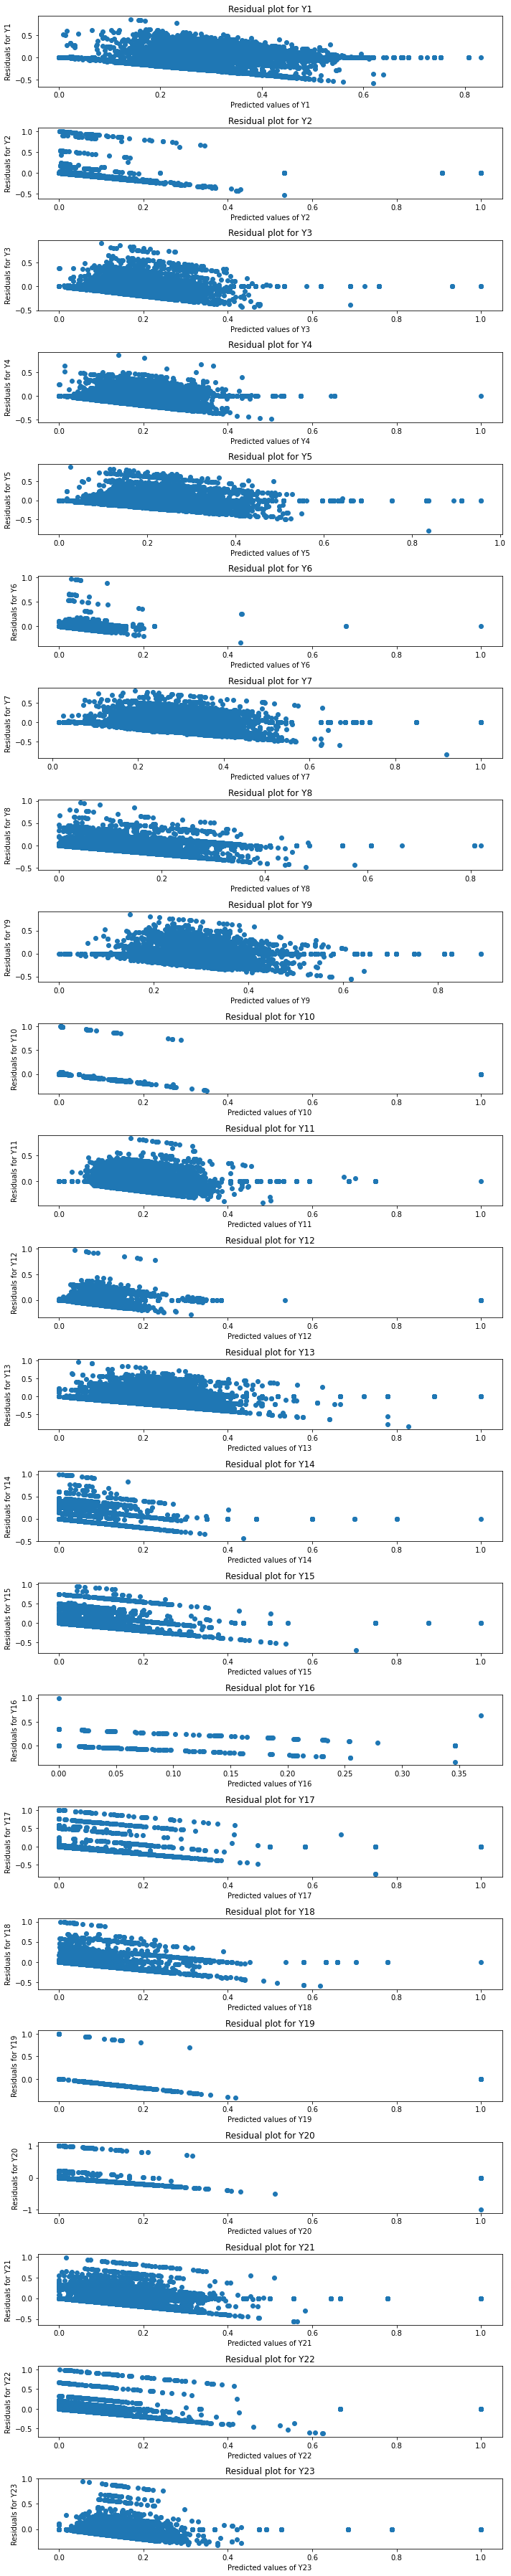

In [58]:
# Create residual plots for each target variable
num_targets = y_val.shape[1]  # 23 target variables
fig, axs = plt.subplots(num_targets, 1, figsize=(10, 50))

for i in range(num_targets):
    # Calculate residuals for target variable i
    #Y_predicted = model.predict(X)
    #Y_residuals = Y.iloc[:, i] - Y_predicted[:, i]
    #print(y_pred_knreg)
    y_residuals = y_val.iloc[:, i] - y_pred_knreg_ht[:, i]
    # Create scatter plot of residuals against predicted values
    axs[i].scatter(y_pred_knreg_ht[:, i], y_residuals)
    axs[i].set_xlabel('Predicted values of Y' + str(i+1))
    axs[i].set_ylabel('Residuals for Y' + str(i+1))
    axs[i].set_title('Residual plot for Y' + str(i+1))
    
plt.tight_layout()
plt.show()

Predicting model on the test set

In [59]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [60]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.0642722158284598

In [61]:
r2_score(y_test, y_pred_knreg_test)

0.32992720323482155

In [62]:
mean_squared_error(y_test, y_pred_knreg_test)

0.01723934973137822

In [63]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.1263411866823261

In [64]:
y_test

,X..Delta9-THC,X..CBD,X..CBN,X..CBG,X..CBC,X..THCV,X..D-Limonene,X..Beta-Ocimene,X..Beta-Myrcene,X..Beta-Pinene,...,X..3-Carene,X..Alpha-Terpinene,X..Ocimene,X..Eucalyptol,X..Terpinolene,X..Isopulegol,X..Geraniol,X..Guaiol,X..CaryophylleneOxide,X..Alpha-Bisabolol
6277,0.026002,0.001046,0.034483,0.034749,0.122807,0.010309,1.000000,0.153846,0.046875,0.022222,...,0.000000,0.000,0.0,0.0,0.021053,0.0,0.0,0.000000,0.0,0.263158
5626,0.000000,0.040812,0.034483,0.003861,0.017544,0.010309,0.037975,0.000000,0.242188,0.005556,...,0.000000,0.000,0.0,0.0,0.000000,0.0,0.0,0.444444,1.0,0.157895
10977,0.280718,0.005581,0.137931,0.530245,0.152047,0.096220,0.206751,0.606838,0.268229,0.012593,...,0.466667,0.750,0.0,0.0,0.659649,0.0,0.0,0.000000,0.0,0.017544
34451,0.587030,0.002093,0.137931,0.200772,0.368421,0.030928,0.101266,0.076923,0.492188,0.002222,...,0.000000,0.000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
24460,0.000000,0.001046,0.034483,0.003861,0.017544,0.010309,0.164557,0.000000,0.023438,0.004444,...,0.000000,0.000,0.0,0.0,0.021053,0.0,0.0,0.000000,0.0,0.210526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27510,0.419241,0.006383,0.227586,0.289575,0.203509,0.072165,0.088608,0.151282,0.440625,0.002556,...,0.000000,0.075,0.0,0.0,0.181053,0.0,0.0,0.100000,0.0,0.094737
39256,0.124853,0.001196,0.068966,0.131826,0.097744,0.022091,0.339964,0.000000,0.223214,0.005714,...,0.000000,0.000,0.0,0.0,0.010526,0.0,0.0,0.111111,0.0,0.233083
3343,0.249893,0.007011,0.155172,0.097297,0.236842,0.010309,0.091139,0.333333,0.539844,0.003667,...,0.000000,0.000,0.0,0.0,0.004211,0.0,0.0,0.000000,0.0,0.084211
1981,0.605384,0.000000,0.413793,0.223938,0.508772,0.154639,0.063291,0.051282,0.296875,0.002222,...,0.000000,0.000,0.0,0.0,0.000000,0.0,0.0,0.333333,0.0,0.157895


In [65]:
type(y_pred_knreg_test)

numpy.ndarray

Error analysis

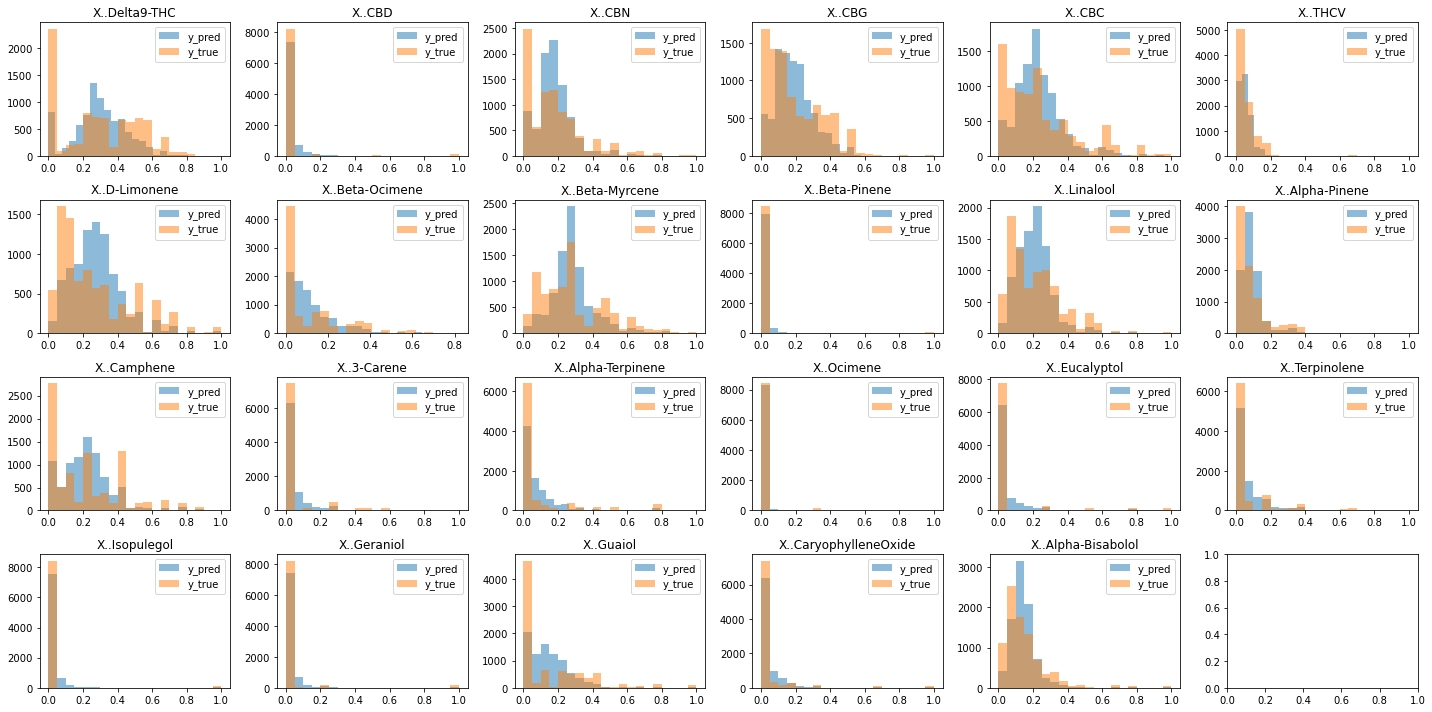

In [66]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, axs = plt.subplots(nrows=4, ncols=6, figsize=(20, 10))

for i, column in enumerate(y_test.columns):
    row = i // 6
    col = i % 6
    axs[row, col].hist(y_pred_knreg_test[:, i], alpha=0.5, label='y_pred', bins=20)
    axs[row, col].hist(y_test.iloc[:, i], alpha=0.5, label='y_true', bins=20)
    axs[row, col].legend(loc='upper right')
    axs[row, col].set_title(column)

plt.tight_layout()
plt.show()


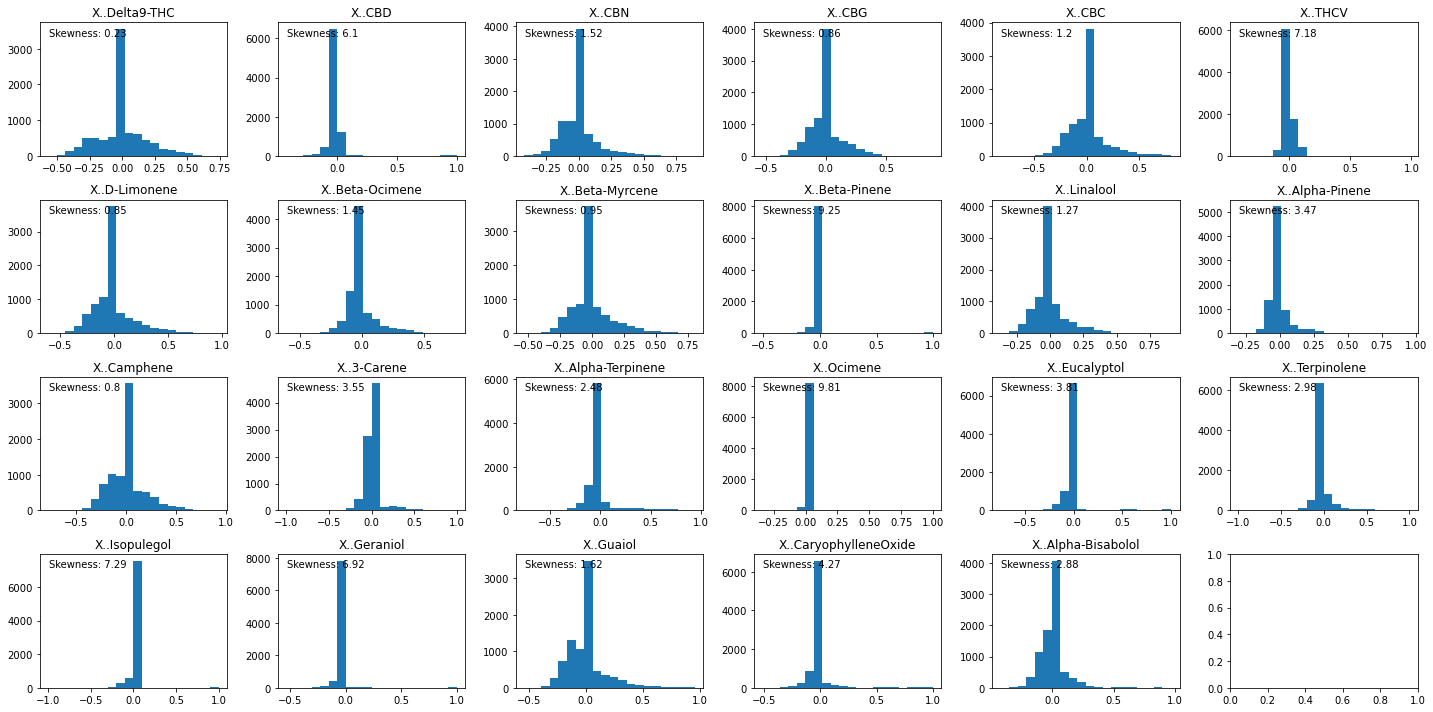

In [67]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
errors = y_test - y_pred_knreg_test
fig, axs = plt.subplots(nrows=4, ncols=6, figsize=(20, 10))

for i, column in enumerate(y_test.columns):
    row = i // 6
    col = i % 6
    axs[row, col].hist(errors.iloc[:, i], bins=20)
    axs[row, col].set_title(column)
    axs[row, col].text(0.05, 0.9, f"Skewness: {np.round(errors.iloc[:, i].skew(), 2)}", transform=axs[row, col].transAxes)

plt.tight_layout()
plt.show()

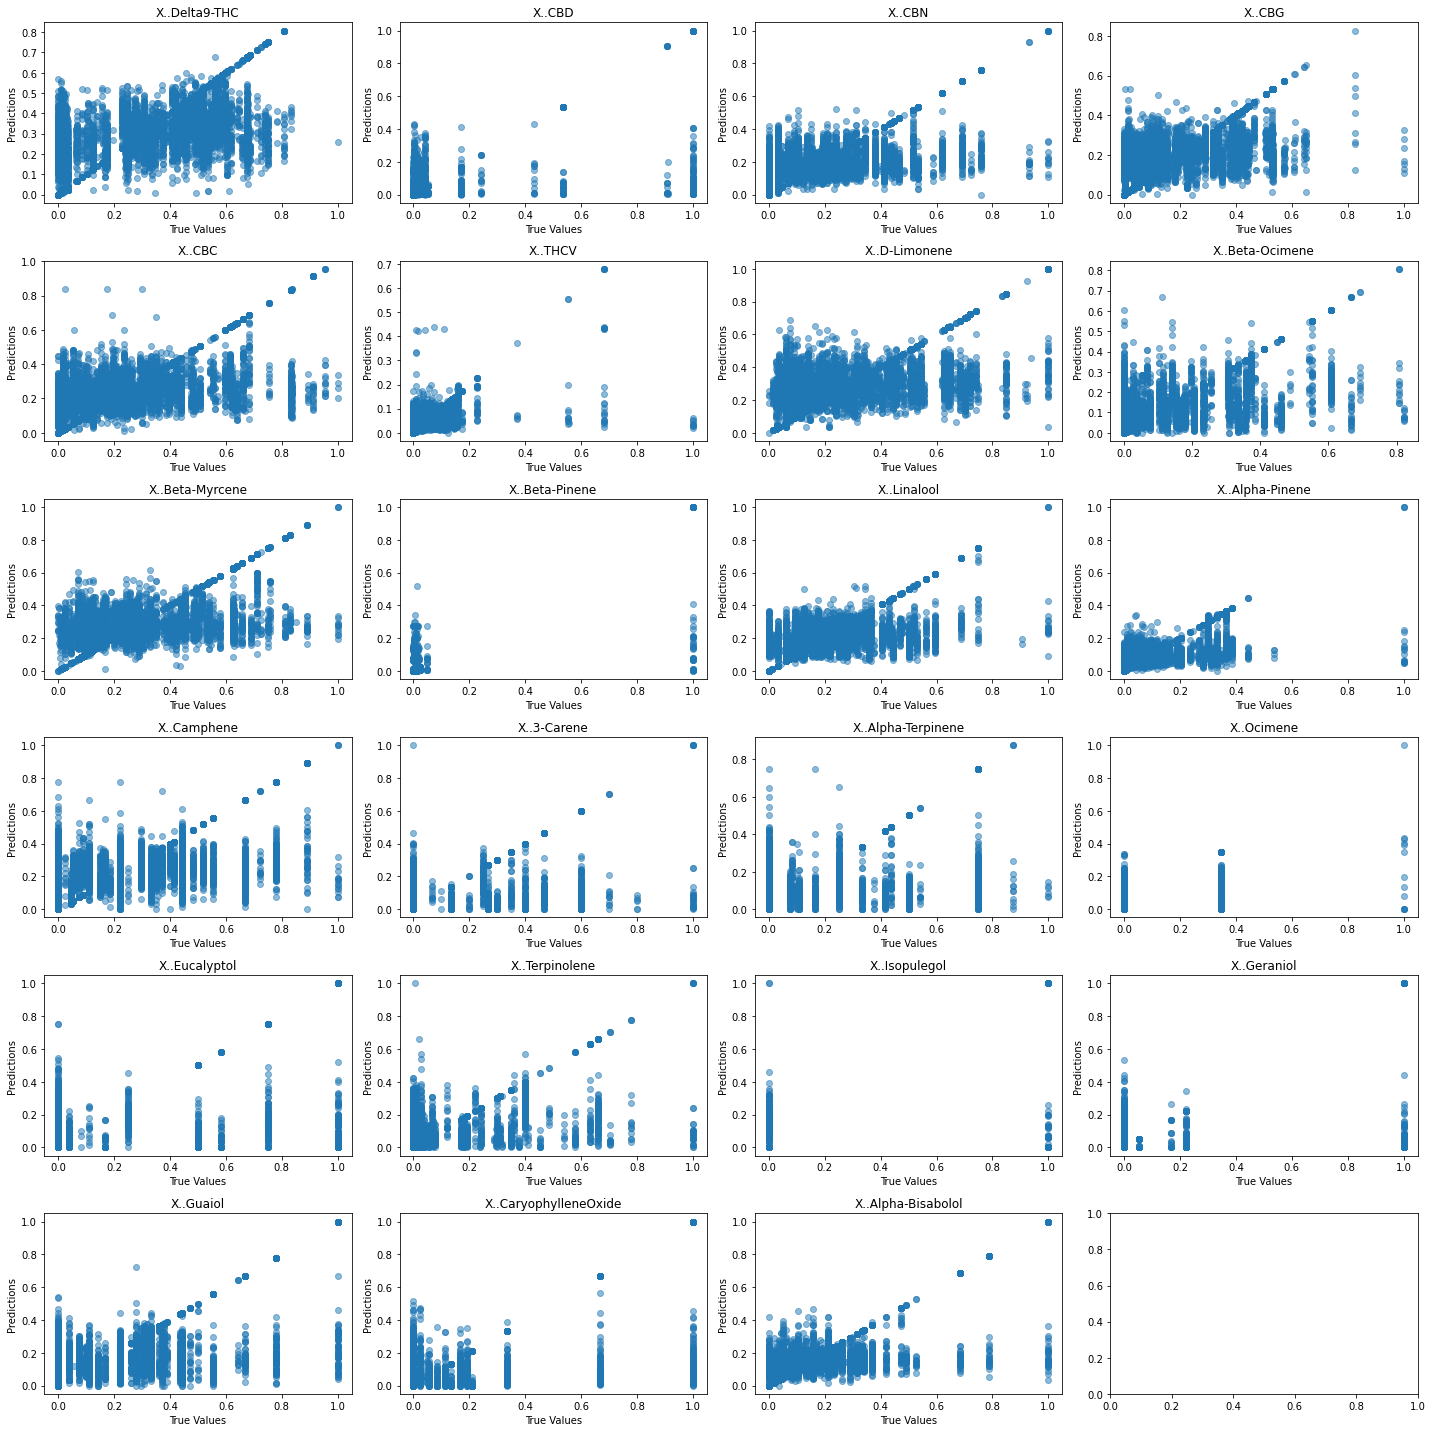

In [68]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, axs = plt.subplots(nrows=6, ncols=4, figsize=(20, 20))

for i, column in enumerate(y_test.columns):
    row = i // 4
    col = i % 4
    axs[row, col].scatter(y_test.iloc[:, i], y_pred_knreg_test[:, i], alpha=0.5)
    axs[row, col].set_xlabel('True Values')
    axs[row, col].set_ylabel('Predictions')
    axs[row, col].set_title(column)

plt.tight_layout()
plt.show()

Pearson R

In [70]:
for i in range(num_targets):
    true_values_i = y_test.iloc[:, i].values  # Get the true values for target i
    predicted_values_i = y_pred_knreg_test[:, i]  # Get the predicted values for target i
    r_i, p_i = pearsonr(true_values_i, predicted_values_i)  # Calculate Pearson correlation coefficient and p-value
    print(f"Target {i}: Pearson correlation coefficient={r_i}, p-value={p_i}")

Target 0: Pearson correlation coefficient=0.5982543501787754, p-value=0.0
Target 1: Pearson correlation coefficient=0.46243467241876124, p-value=0.0
Target 2: Pearson correlation coefficient=0.585075985571383, p-value=0.0
Target 3: Pearson correlation coefficient=0.6025815096155377, p-value=0.0
Target 4: Pearson correlation coefficient=0.5661336524887746, p-value=0.0
Target 5: Pearson correlation coefficient=0.53853716685154, p-value=0.0
Target 6: Pearson correlation coefficient=0.5850311788181537, p-value=0.0
Target 7: Pearson correlation coefficient=0.6408767289817008, p-value=0.0
Target 8: Pearson correlation coefficient=0.5794265702895345, p-value=0.0
Target 9: Pearson correlation coefficient=0.5991485077186288, p-value=0.0
Target 10: Pearson correlation coefficient=0.5836039797168533, p-value=0.0
Target 11: Pearson correlation coefficient=0.5861526606649027, p-value=0.0
Target 12: Pearson correlation coefficient=0.5782564592522872, p-value=0.0
Target 13: Pearson correlation coeffi

Text(0.5, 1.0, 'Pearson Correlation Coefficients')

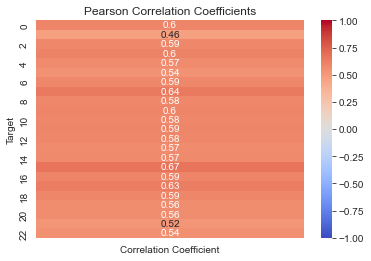

In [74]:
import seaborn as sns

results = []
for i in range(num_targets):
    true_values_i = y_test.iloc[:, i].values  # Get the true values for target i
    predicted_values_i = y_pred_knreg_test[:, i]  # Get the predicted values for target i
    r_i, p_i = pearsonr(true_values_i, predicted_values_i)  # Calculate Pearson correlation coefficient and p-value
    results.append({
        'Target': i,
        'Correlation Coefficient': r_i,
        'P-value': p_i
    })

df = pd.DataFrame(results)

sns.set_style("whitegrid")
corr_heatmap = sns.heatmap(df.pivot_table(index='Target', columns=None, values='Correlation Coefficient'),
                           annot=True, cmap="coolwarm", center=0, vmin=-1, vmax=1)
corr_heatmap.set_title('Pearson Correlation Coefficients')

